<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a <font color='blue'>**Regression problem**<font>.
    
    Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle

from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.backend import clear_session

%matplotlib inline

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [2]:
df = load_diabetes()

In [3]:
load_diabetes(as_frame=True)

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

In [4]:
load_diabetes(as_frame=True)['frame']

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [5]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
df.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
df.data.shape

(442, 10)

In [8]:
df.target.shape

(442,)

### Prepare input data

In [9]:
# Define features and target
X = df.data
y = df.target

In [10]:
pd.DataFrame(X, columns=df.feature_names)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


### Split the data (training/test)

In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((353, 10), (353,), (89, 10), (89,))

### Create the model's architecture

In [12]:
# Define model
clear_session()

n_cols = X_train.shape[1]

model = Sequential()
model.add(Dense(20, activation = 'relu', input_shape = (n_cols, ), name = 'hidden_1'))
model.add(Dense(10, activation = 'relu', name = 'hidden_2'))
# model.add(Dense(10, activation = 'relu', name = 'hidden_3'))
model.add(Dense(1, activation = 'linear', name = 'output'))

### Compile the model

In [13]:
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 20)                220       
                                                                 
 hidden_2 (Dense)            (None, 10)                210       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


### Fit the training data

In [14]:
# Optional: shuffle data
# X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [15]:
%%time

# Fit model
history = model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=10, verbose=0)

Wall time: 8.77 s


### Create predictions

In [16]:
test_size = 5

# Make predictions
y_pred = model.predict(X_test) 
y_pred[:test_size]

3/3 [==============================] - 0s 3ms/step


array([[151.05609],
       [173.20737],
       [147.93413],
       [293.17065],
       [135.58002]], dtype=float32)

In [17]:
y_test[:test_size]

array([219.,  70., 202., 230., 111.])

### Evaluate the model

In [18]:
# List data in history
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [19]:
# Evaluate model with test data
scores = model.evaluate(X_test, y_test, verbose = 0)
print(f'Test loss: {scores[0]:.4f}') 
print(f'Test mean absolute error: {scores[1]:.4f}')

Test loss: 2922.6846
Test mean absolute error: 43.4347


In [20]:
# Alternatively
for i, m in enumerate(model.metrics_names):
    print(f"{m}: {scores[i]:.4f}")

loss: 2922.6846
mae: 43.4347


In [21]:
# RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse:.3f}')

RMSE: 54.062


### Visualisation of cost

In [22]:
plt.style.use('fivethirtyeight')

In [23]:
def plot_loss(history):
    """
    Function to plot training and validation loss
    """
    plt.figure(figsize=(6,4))
    plt.plot(history.history["loss"], color="r", label="Training Loss")
    plt.plot(history.history["val_loss"], color="b", label="Validation Loss")
    plt.legend(loc="upper right")
    plt.xlabel("Epoch", fontsize=16)
    plt.ylabel("Loss", fontsize=16)
    plt.ylim([0, max(history.history["loss"])+1000])
    plt.title("Training and Validation Loss", fontsize=16);

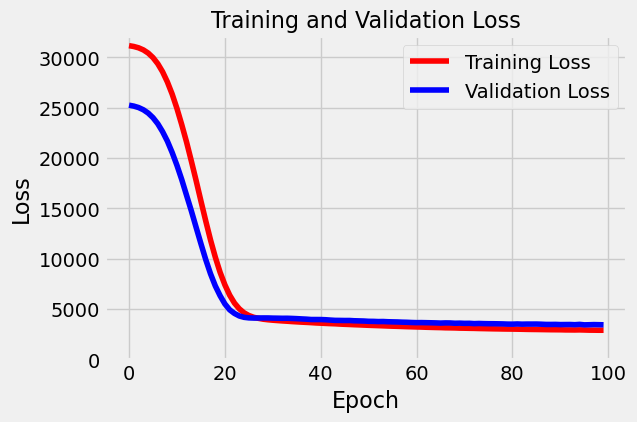

In [24]:
plot_loss(history)

### Visualisation of residuals

In [42]:
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, y_pred)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

In [43]:
y_pred[:5], y_pred.shape

(array([[151.05609],
        [173.20737],
        [147.93413],
        [293.17065],
        [135.58002]], dtype=float32),
 (89, 1))

In [44]:
y_pred.flatten(), y_pred.flatten().shape

(array([151.05609 , 173.20737 , 147.93413 , 293.17065 , 135.58002 ,
        106.0671  , 236.97133 , 194.8827  , 103.40953 , 117.928375,
         97.30126 , 157.9517  ,  64.695694, 217.82411 , 118.00735 ,
        138.34396 , 226.87769 , 247.34106 , 187.4262  , 211.88579 ,
        192.31584 ,  98.06098 ,  80.46393 , 191.50809 , 144.5865  ,
        169.98558 , 182.82268 , 183.54286 ,  53.56025 , 129.71019 ,
        177.97495 ,  96.37111 , 141.50813 , 191.84564 , 182.0543  ,
        176.46635 , 139.79942 , 138.42972 , 173.29434 ,  65.84193 ,
         92.26062 , 116.78294 , 163.56638 , 177.60924 , 176.88031 ,
         63.6012  ,  87.10292 , 105.38432 ,  68.751785, 148.4829  ,
        142.35861 ,  68.93784 , 126.53262 , 114.89673 , 173.52414 ,
        139.56288 , 107.7342  , 198.67863 , 112.934166,  69.18036 ,
        184.30385 , 189.21867 , 133.89432 , 118.76792 , 138.5077  ,
        190.89165 , 173.55417 , 164.58897 , 107.640625, 146.60846 ,
        181.5258  , 199.66278 , 252.85075 , 145.

In [45]:
y_test, y_test.shape

(array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
        252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  64.,
        128., 232., 129., 118., 263.,  77.,  48., 107., 140., 113.,  90.,
        164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
         90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
         95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
        181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
        220., 237., 233.,  68., 190.,  96.,  72., 153.,  98.,  37.,  63.,
        184.]),
 (89,))

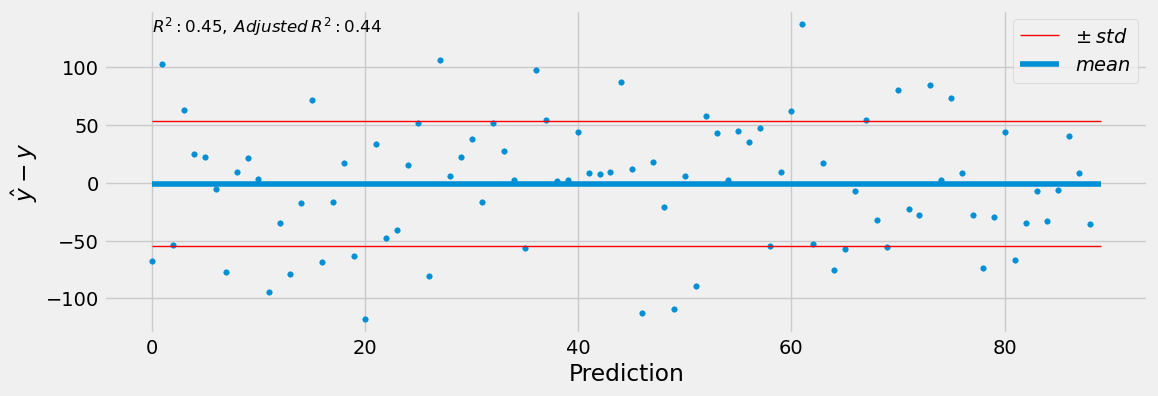

In [46]:
difference = y_pred.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(y_pred)

plt.figure(figsize = (12, 4))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95, '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2), fontsize = 12);



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



